# Personal Information
Name: **Mannes Mokkenstorm**

StudentID: **11922222**

Email: [**11922222@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **02 04 2025**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**

In this project, I make use of two widely recognized datasets in the domain of mathematical problem solving: GSM8K and the MATH dataset. The GSM8K (Grade School Math 8K) dataset consists of 8,500 high-quality grade school-level word problems, designed to evaluate the reasoning and arithmetic capabilities of language models. It emphasizes step-by-step reasoning in natural language. The MATH dataset, on the other hand, contains 12,500 competition-style problems covering a broad range of mathematical topics typically found in high school math contests. These problems are more complex and require advanced symbolic reasoning.

Together, these datasets provide a comprehensive benchmark for evaluating mathematical reasoning abilities across different difficulty levels and problem formats.


In [2]:
# Imports
import os
import numpy as np
import pandas as pd


from datasets import load_dataset

from research_datasets.math_500_dataset import load_math_dataset
# Load the MATH dataset


/Users/mannes/thesis/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
math_test = load_math_dataset()
#
# gsm8k_dataset = load_dataset("gsm8k", "main")
# gsm8k_train, gsm8k_test = pd.DataFrame(gsm8k_dataset["train"]) , pd.DataFrame(gsm8k_dataset["test"])
#
# gsm8k_train.rename(columns={'question': 'problem'}, inplace=True)
# gsm8k_test.rename(columns={'question': 'problem'}, inplace=True)



### Data Loading

,problem,solution,answer,subject,difficulty
0,"Convert the point $(0,3)$ in rectangular coord...",We have that $r = \sqrt{0^2 + 3^2} = 3.$ Also...,"\left( 3, \frac{\pi}{2} \right)",Precalculus,2
1,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,We count the number of times $\frac{1}{n^3}$ a...,p - q,Intermediate Algebra,5
2,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...",$f(-2)+f(-1)+f(0)=\frac{3(-2)-2}{-2-2}+\frac{3...,\frac{14}{3},Algebra,3
3,How many positive whole-number divisors does 1...,First prime factorize $196=2^2\cdot7^2$. The ...,9,Number Theory,3
4,The results of a cross-country team's training...,Evelyn covered more distance in less time than...,\text{Evelyn},Algebra,2
...,...,...,...,...,...
195,Let $p(x)$ be a monic polynomial of degree 4. ...,"Since three of the roots of $p(x)$ are 1, 2, a...",24,Intermediate Algebra,4
196,$441+2(21)(19)+361=x$. Solve for $x$.,"We note that $361=19^2$ and $441=21^2$, so $x=...",1600,Algebra,1
197,"If $x^3$ is a positive factor of $10!,$ how ma...","First, we factor $10!:$\n\begin{align*} 10!&=1...",6,Number Theory,5
198,In how many ways can 6 girls and 2 boys sit in...,"We can consider the two boys as one person, ar...","10,\!080",Counting & Probability,3


### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the dataset to a DataFrame
gsm8k_df = pd.DataFrame(gsm8k_train)

# Display basic information
print(gsm8k_df.info())

# Display summary statistics
print(gsm8k_df.describe())

# Example: Plot the distribution of problem lengths
gsm8k_df['problem_length'] = gsm8k_df['problem'].apply(len)
gsm8k_df['problem_length'].hist(bins=50)
plt.title('Distribution of problem Lengths')
plt.xlabel('Length of problem')
plt.ylabel('Frequency')
plt.show()


In [4]:
math_train.rename(columns={'problem': 'problem'}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   problem    12000 non-null  object
 1   solution   12000 non-null  object
 2   answer     12000 non-null  object
 3   subject    12000 non-null  object
 4   level      12000 non-null  int64 
 5   unique_id  12000 non-null  object
 6   id         12000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 656.4+ KB
None
              level           id
count  12000.000000  12000.00000
mean       3.474833   5999.50000
std        1.292158   3464.24595
min        1.000000      0.00000
25%        2.000000   2999.75000
50%        4.000000   5999.50000
75%        5.000000   8999.25000
max        5.000000  11999.00000


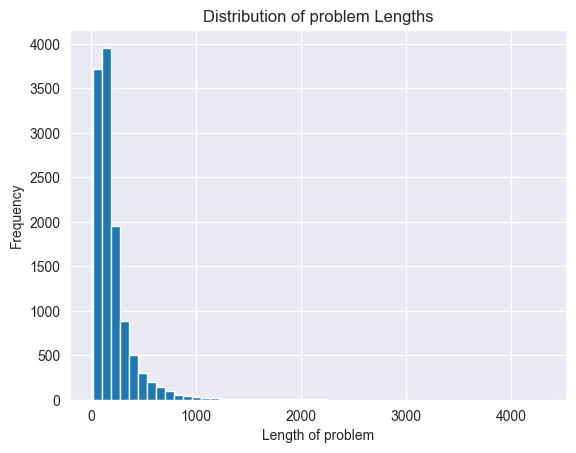

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the dataset to a DataFrame
math_train = pd.DataFrame(math_train)

# Display basic information
print(math_train.info())

# Display summary statistics
print(math_train.describe())


# Plot the distribution of problem lengths
math_train['problem_length'] = math_train['problem'].apply(len)
math_train['problem_length'].hist(bins=50)
plt.title('Distribution of problem Lengths')
plt.xlabel('Length of problem')
plt.ylabel('Frequency')
plt.show()

### Analysis 2: Analyzing the Log Probability of the token outputs

The idea behind this is to find a proxy for the difficulty of a model to output the correct tokens with a Pass@k score


### Analysis n:

In [1]:
# initialize model
from machine_learning.models.base_models.qwen_2_15b import QWen215BModel
from machine_learning.pipeline.prompts import BASIC_MATH_REASONING_PROMPT
from machine_learning.pipeline.log_probability_pipeline import generate_log_probabilities

/Users/mannes/thesis/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Initialize the model
model = QWen215BModel(temperature=0.8, max_tokens=2000)

Ollama server started on http://localhost:11434/v1 for qwen2.5:1.5b model.


In [7]:
model =QWen215BModel()


Ollama server started on http://localhost:11434/v1 for qwen2.5:1.5b model.


'The answer is 4.'

In [8]:
model.generate_response(prompt="Generate a short story about a cat")

'Once upon a time, there was a little white cat named Fluffy. Fluffy lived in a cozy house with her human friends. She loved to play with her toys and explore the house.\n\nOne day, Fluffy\'s owner took her on a trip to the park. Fluffy was excited to see all the other cats she met. As they were walking, Fluffy spotted a group of birds sitting on a branch in the trees. Without thinking, Fluffy sprang into action and started chasing the birds.\n\nHer owner was surprised by Fluffy\'s sudden dash for the birds. "Fluffy, what are you doing?" she asked.\n\n"I\'m trying to catch those birds," Fluffy replied with a playful grin.\n\nAs Fluffy chased the birds, her friends tried to stop her. But it didn\'t matter — Fluffy was too fast! She caught one bird after another and brought them all home with her.\n\nWhen Fluffy finally returned to the house, she was tired from her adventure. But instead of being upset, her owner gave her a big hug and said, "That was a great adventure, Fluffy. You\'re a

In [10]:
model_0_0 = QWen215BModel(temperature=0.0, max_tokens=2000)

Ollama server started on http://localhost:11434/v1 for qwen2.5:1.5b model.


In [ ]:
model.generate_response(prompt='What is 2+2?')

In [9]:
model.generate_response(prompt="Generate a short story about a cat")

'Once upon a time in a small town, there was a curious little cat named Whiskers. Whiskers lived in a cozy black box near the edge of the town, always exploring and looking for new adventures.\n\nOne day, Whiskers discovered a beautiful patch of garden hidden behind a bush. As she stepped closer to investigate, a mischievous squirrel nearby noticed her and quickly jumped out of the tree, scurrying away into the woods.\n\nWhiskers called out to the squirrel, "Hey, you\'re not supposed to be here! Can\'t you see I\'m trying to look at your acorn collection? Please leave me alone!"\n\nThe squirrel looked up at Whiskers with curious eyes. "Oh, hello there! I didn\'t know you were here. My apologies for being so noise. But I can\'t let you alone. I have to get my acorns first."\n\nWhiskers p guarantee her tail and meowed loudly as the squirrel ran off into the woods again.\n\nIt wasn\'t long before Whiskers returned to her black box, looking determined. "I\'ll be back in a few minutes," she

In [11]:
model_0_0.generate_response(prompt="Generate a short story about a cat")

"Once upon a time, in a small town nestled in the mountains, there lived a little black cat named Trixi. Trixi was a curious and adventurous cat who loved to explore the woods and fields around her home.\n\nOne day, while out on one of her many adventures, Trixi stumbled upon a hidden cave deep in the forest. The cave was dark and foreboding, but Trixi's playful spirit took over and she decided to investigate.\n\nAs she entered the cave, Trixi found a small bowl of food waiting for her. She padding over to it, she discovered that the bowl contained a special treat that made her fur stand on end and caused her to meow in excitement.\n\nTrixi quickly devoured the treat and felt a strange energy course through her body. She realized that she had been living in a world without any real purpose, but now she was excited to explore what else the cave might hold.\n\nAs Trixi explored deeper into the cave, she came across a small door at the end of a dark passage. Curiosity got the best of her 

In [12]:
model_0_0.generate_response(prompt="Generate a short story about a cat")

'Once upon a time, there was a little black cat named Trixi who lived in a cozy house with her human. Trixi was a curious and playful cat who loved to spend her days exploring the yard and playing with her toys.\n\nOne day, while out for a walk, Trixi stumbled upon a group of other cats in the park. They were all meowing and playing together, and Trixi couldn\'t help but be drawn in by their excitement.\n\nAs she joined in on the fun, Trixi discovered that these cats had a special game they played called "chasing tails." Each cat would chase after the tail of the next cat in line, creating a never-ending cycle of pursuit.\n\nTrixi was fascinated by this game and quickly became an expert at chasing tails. She would jump up and down, her paws thudding against the grass as she tried to catch up to the other cats.\n\nAs the sun began to set and it started to get dark outside, Trixi realized that she had lost track of who was in front of her. She started to panic, knowing that if she couldn

In [9]:
math_problem = BASIC_MATH_REASONING_PROMPT.format(problem="What is 2+2?")
example_output = model.generate_response(math_problem)
print(f"Example output: {example_output}")

Example output: #### Step 1: Identify the Operation
The problem requires us to find the sum of 2 and 2.

#### Step 2: Apply the Addition Principle
Addition is a basic arithmetic operation that combines two numbers to produce a third number. The addition principle states that for any two numbers \(a\) and \(b\), their sum is denoted as \(a + b\). In this case, \(a = 2\) and \(b = 2\).

#### Step 3: Perform the Calculation
According to the addition principle, we combine the values of \(a\) and \(b\):
\[2 + 2 = 4\]

#### Step 4: Verify the


In [13]:
log_probabilities = generate_log_probabilities(math_test, max_sample_size=100)

2025-04-03 22:05:00.953 | INFO     | machine_learning.pipeline.log_probability_pipeline:generate_log_probabilities:41 - Processing sample 0 out of 500, with a max of 100 samples
2025-04-03 22:05:00.953 | DEBUG    | machine_learning.pipeline.log_probability_pipeline:generate_log_probabilities:42 - Final prompt: You are a math reasoning assistant. Your job is to solve the following problem:
Question: Convert the point $(0,3)$ in rectangular coordinates to polar coordinates.  Enter your answer in the form $(r,\theta),$ where $r > 0$ and $0 \le \theta < 2 \pi.$
Answer: We have that $r = \sqrt{0^2 + 3^2} = 3.$  Also, if we draw the line connecting the origin and $(0,3),$ this line makes an angle of $\frac{\pi}{2}$ with the positive $x$-axis.

[asy]
unitsize(0.8 cm);

draw((-0.5,0)--(3.5,0));
draw((0,-0.5)--(0,3.5));
draw(arc((0,0),3,0,90),red,Arrow(6));

dot((0,3), red);
label("$(0,3)$", (0,3), W);
dot((3,0), red);
[/asy]

Therefore, the polar coordinates are $\boxed{\left( 3, \frac{\pi}{2}

In [27]:
generated_answer = []
for i, (question, answer) in enumerate(zip(math_test['problem'], math_test['answer']), start=1):
    math_problem = BASIC_MATH_REASONING_PROMPT.format(problem=question)
    generated_answer.append((i, model.generate_response(math_problem)))
    print(generated_answer)
    break


2025-04-03 22:20:36,893 - camel.camel.memories.context_creators.score_based - WARNING - Context truncation required (2521 > 2000), pruning low-score messages.
[(1, '### Step 1: Calculate \\( r \\)\n\nThe formula for converting from rectangular coordinates \\((x, y)\\) to polar coordinates \\((r, \\theta)\\) is:\n\\[ r = \\sqrt{x^2 + y^2} \\]\n\nGiven the point \\((0,3)\\), we substitute \\( x = 0 \\) and \\( y = 3 \\):\n\\[ r = \\sqrt{0^2 + 3^2} = \\sqrt{9} = 3 \\]\n\n### Step 2: Calculate \\( \\theta \\)\n\nThe formula for the angle \\(\\theta\\) is:\n\\[ \\theta = \\tan^{-1}\\left( \\frac{y}{x} \\right) \\]\n\nFor the point \\((0,3)\\), substituting \\( x = 0 \\) and \\( y = 3 \\) gives:\n\\[ \\theta = \\tan^{-1}\\left( \\frac{3}{0} \\right) \\]\n\nThe expression \\(\\frac{3}{0}\\) is undefined because we are dividing by zero. This indicates that the angle \\(\\theta\\) corresponds to a direction where the x-coordinate is zero, which happens on the y-axis.\n\n### Step 3: Determine \\

,0,1
0,1,### Step 1: Calculate \( r \)\n\nThe formula f...


In [22]:
example_output

"To convert the point \\((0,3)\\) from rectangular coordinates to polar coordinates, we need to find the values of \\(r\\) and \\(\\theta\\). The formulas for converting from rectangular coordinates \\((x,y)\\) to polar coordinates \\((r,\\theta)\\) are:\n\\[ r = \\sqrt{x^2 + y^2} \\]\n\\[ \\theta = \\tan^{-1}\\left(\\frac{y}{x}\\right) \\]\n\nLet's go through the steps:\n\n### Step 1: Calculate \\(r\\)\nThe formula for \\(r\\) is:\n\\[ r = \\sqrt{x^2 + y^2} \\]\nSubstituting \\(x = 0\\) and \\(y = 3\\) into the formula, we get:\n\\[ r = \\sqrt{0^2 + 3^2} = \\sqrt{9} = 3 \\]\n\n### Step 2: Calculate \\(\\theta\\)\nThe formula for \\(\\theta\\) is:\n\\[ \\theta = \\tan^{-1}\\left(\\frac{y}{x}\\right) \\]\nSubstituting \\(x = 0\\) and \\(y = 3\\) into the formula, we get:\n\\[ \\theta = \\tan^{-1}\\left(\\frac{3}{0}\\right) \\]\n\nThe expression \\(\\frac{3}{0}\\) is undefined, which means that the point \\((0,3)\\) lies on the positive y-axis. In this case, \\(\\theta\\) is \\(\\frac{\\

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="ticks")


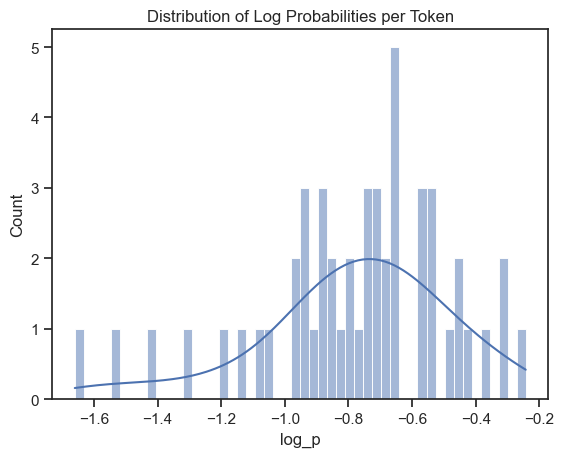

In [31]:
sns.histplot(log_probabilities['avg_log_p'], bins=50, kde=True)
plt.title('Distribution of Log Probabilities per Token')
plt.xlabel('log_p')
plt.ylabel('Count')
plt.show()


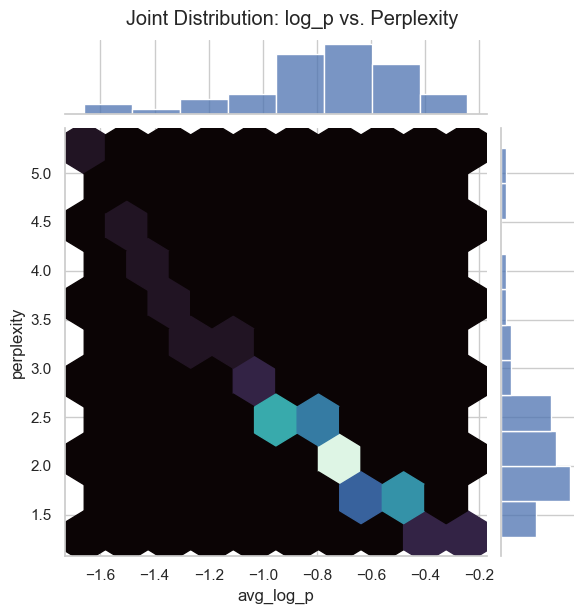

In [18]:
sns.jointplot(x='avg_log_p', y='perplexity', data=log_probabilities, kind='hex', cmap='mako')
plt.suptitle('Joint Distribution: log_p vs. Perplexity', y=1.02)
plt.show()


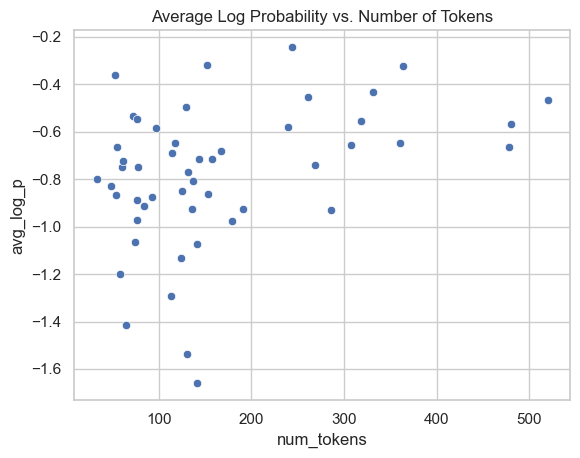

In [19]:
sns.scatterplot(x='num_tokens', y='avg_log_p', data=log_probabilities)
plt.title('Average Log Probability vs. Number of Tokens')
plt.xlabel('num_tokens')
plt.ylabel('avg_log_p')
plt.show()


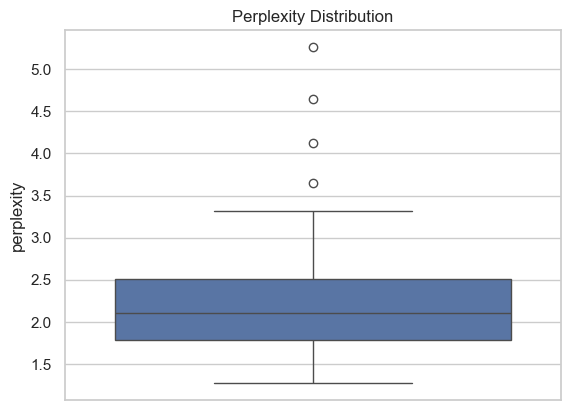

In [20]:
sns.boxplot(data=log_probabilities, y='perplexity')
plt.title('Perplexity Distribution')
plt.ylabel('perplexity')
plt.show()

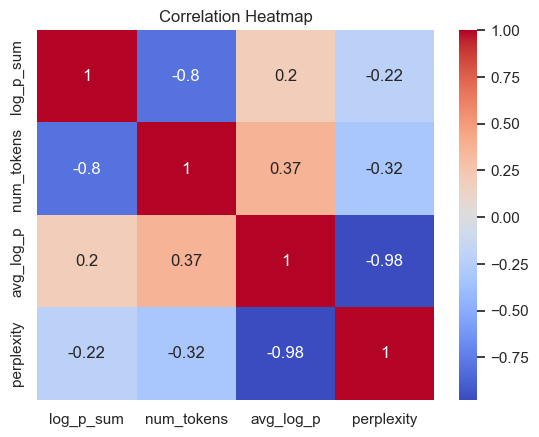

In [21]:
sns.heatmap(log_probabilities[[ 'log_p_sum', 'num_tokens', 'avg_log_p', 'perplexity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


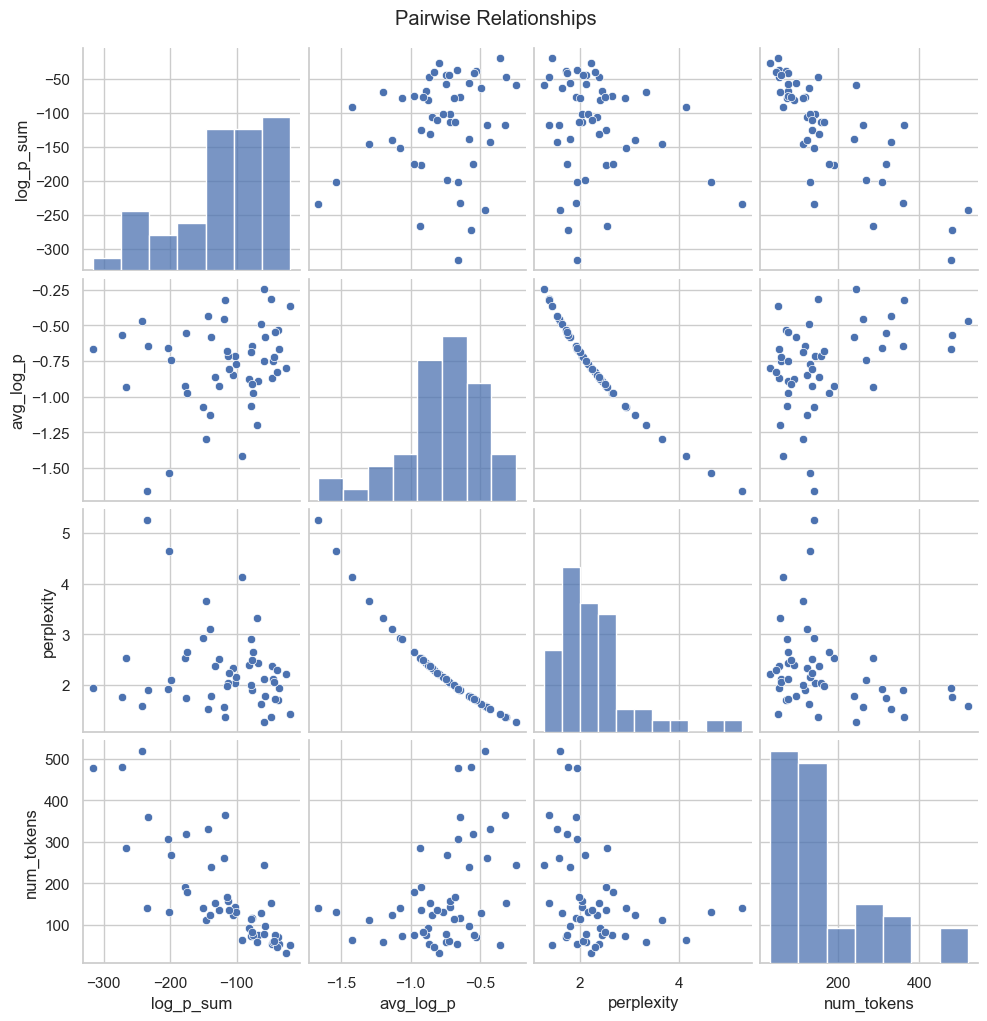

In [22]:
sns.pairplot(log_probabilities[[ 'log_p_sum', 'avg_log_p', 'perplexity', 'num_tokens']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


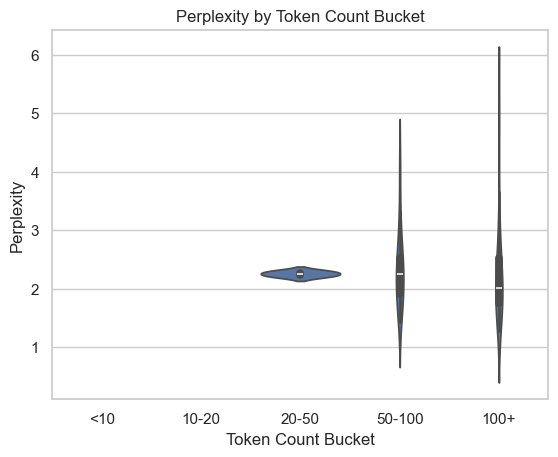

In [23]:
log_probabilities['token_bin'] = pd.cut(log_probabilities['num_tokens'], bins=[0, 10, 20, 50, 100, log_probabilities['num_tokens'].max()], labels=['<10', '10-20', '20-50', '50-100', '100+'])

sns.violinplot(x='token_bin', y='perplexity', data=log_probabilities)
plt.title('Perplexity by Token Count Bucket')
plt.xlabel('Token Count Bucket')
plt.ylabel('Perplexity')
plt.show()


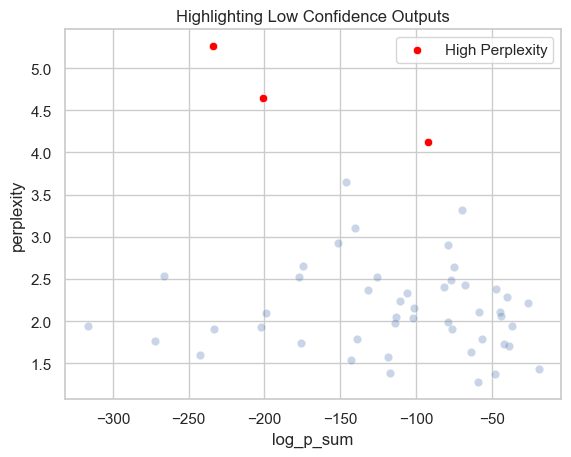

In [24]:
low_conf = log_probabilities[log_probabilities['perplexity'] > log_probabilities['perplexity'].quantile(0.95)]

sns.scatterplot(x='log_p_sum', y='perplexity', data=log_probabilities, alpha=0.3)
sns.scatterplot(x='log_p_sum', y='perplexity', data=low_conf, color='red', label='High Perplexity')
plt.title('Highlighting Low Confidence Outputs')
plt.legend()
plt.show()
